Для вычисления градиента в Python есть специальная функция — gradient() из библиотеки NumPy. Градиент вычисляется на заданной N-мерной сетке с шагом, который можно задать вручную.

Такой градиент немного отличается от того, который мы обсудили ранее, поскольку это градиент для численных значений, а не для функций (хотя он обозначается так же и аналогичен по смыслу). Однако он тоже используется в DS, особенно в задачах компьютерного зрения.

Например, пусть у нас есть чёрно-белая фотография. Тогда вектор градиента может быть вычислен для каждого пикселя изображения. Это просто мера изменения значений пикселей вдоль направлений x и y вокруг каждого пикселя. То есть производная для функции характеризует скорость её изменения, а производная для численного вектора характеризует, как быстро меняются его значения — таким образом, смысл один и тот же.

In [33]:
# Для работы с градиентом импортируем хорошо известную нам библиотеку NumPy:

import numpy as np

In [34]:
# Зададим массив, для которого хотим найти градиент, и вычислим его:

f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)

# array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [35]:
# Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

print(f[1] - f[0], f[-1] - f[-2])

# (4.0, 11.0)

4.0 11.0


In [36]:
# А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2:

(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

12.0

In [37]:
# Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину обычного шага у края и удвоенную величину шага для элементов внутри вектора:

np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))
#2.75
#4.0
#5.5
#6.0

2.75
4.0
5.5
6.0


In [38]:
from sympy import symbols, diff

# Определяем переменные
a, b = symbols('a b', real=True)

# Определяем функцию
f = (5 - a - 2*b)**2

# Находим частные производные по a и b
f_partial_a = diff(f, a)
f_partial_b = diff(f, b)

# Вычисляем градиент в точке (1, 1)
grad_a = f_partial_a.subs({a: 1, b: 1})
grad_b = f_partial_b.subs({a: 1, b: 1})

print(f"Частная производная по a: {f_partial_a}")
print(f"Частная производная по b: {f_partial_b}")
print(f"Градиент в точке (1, 1): ({grad_a}, {grad_b})")


Частная производная по a: 2*a + 4*b - 10
Частная производная по b: 4*a + 8*b - 20
Градиент в точке (1, 1): (-4, -8)


In [39]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=float)
 
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

- Градиентный спуск минимизирует дифференцируемые функции с любым количество переменных. Он делает это, стартуя из случайной точки и далее двигаясь с заданным шагом в направлении антиградиента.
- Градиентный спуск не может определить, является найденный минимум локальным или глобальным. 
- Размер шага определяет, быстро или медленно алгоритм сходится к минимуму или расходится.

Мы разобрались с тем, как работает градиентный спуск в теории. Теперь давайте рассмотрим визуализацию данного процесса. Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

In [40]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [41]:
# Определим функцию, которая вычислит градиент:

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [42]:
# Также запрограммируем простейший вариант для градиентного спуска:

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [43]:
# Напишем функцию, которая будет строить график:

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

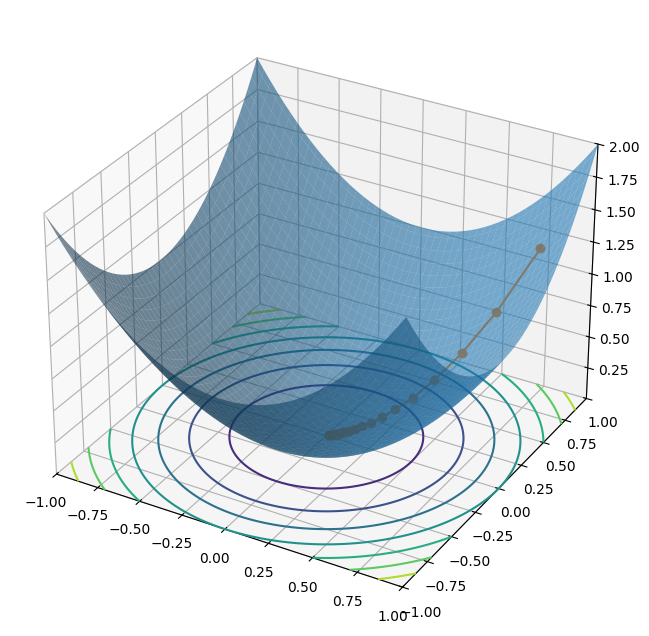

In [44]:
# Визуализируем и получим следующее движение градиентного спуска к минимуму:
import matplotlib.pyplot as plt
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)